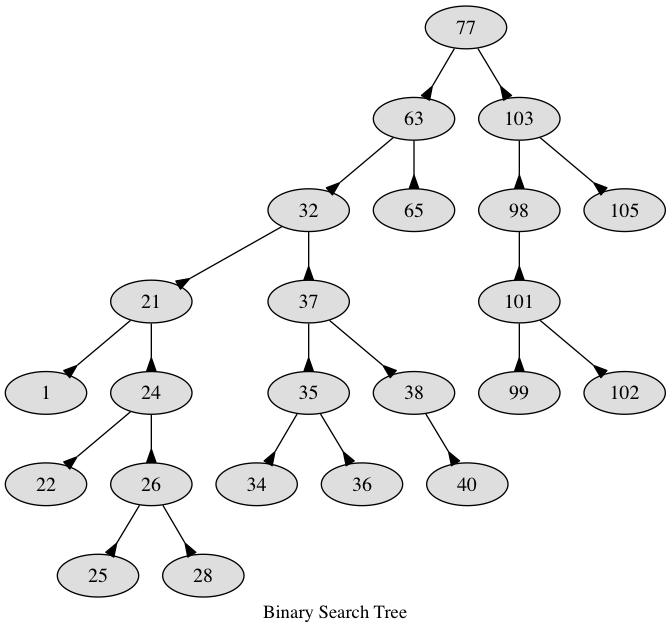

1 21 22 24 25 26 28 32 34 35 36 37 38 40 63 65 77 98 99 101 102 103 105 

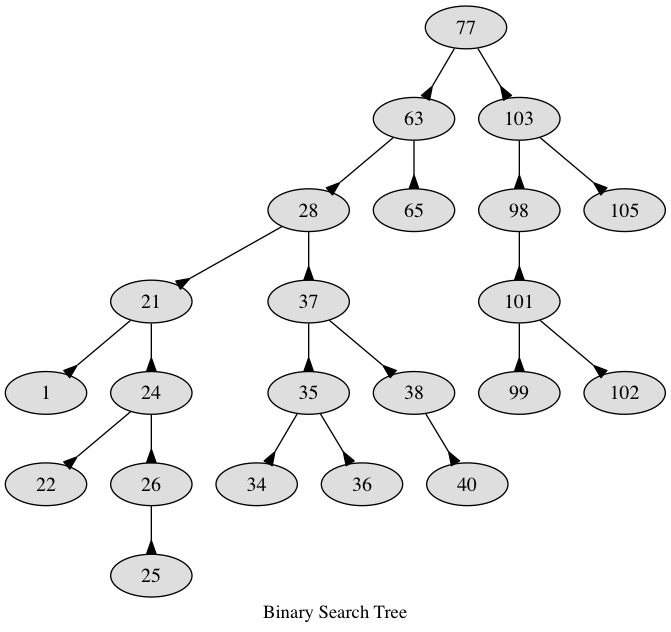

In [1]:
#binary_search_tree ---- deletion
#method1: inoder immediate predecessor

class treenode():
    def __init__(self,value):
        self.value = value
        self.Lchild = None
        self.Rchild = None
        self.parent = None

class binary_search_tree():
    def __init__(self):
        self.root = None
        
    def insert(self,value):
        if self.root == None:
            self.root = treenode(value)
        else:
            self.insert_rec(self.root,value)           
            
    def insert_rec(self,cur_node,value):
        #for calling recursive function
        if value < cur_node.value:
            if cur_node.Lchild:
                self.insert_rec(cur_node.Lchild,value)           
            else:
                cur_node.Lchild = treenode(value)
                cur_node.Lchild.parent = cur_node        
                
        elif value > cur_node.value: 
            if cur_node.Rchild:
                self.insert_rec(cur_node.Rchild,value)    
            else:
                cur_node.Rchild = treenode(value)
                cur_node.Rchild.parent = cur_node
        elif value == cur_node.value:
            print('value: '+str(value)+' has already existed in the tree.')
    
    #----- inorder ------
    def inorder(self):
        #left-root-right
        if self.root != None:
            self.inorder_rec(self.root)
   
    def inorder_rec(self,cur_node):
        #for calling recursive function
        if cur_node.Lchild:
            self.inorder_rec(cur_node.Lchild)
        print(str(cur_node.value) + ' ',end='')   
        if cur_node.Rchild:
            self.inorder_rec(cur_node.Rchild) 
               
    #---------------------
    #serch method(recursion)
    def search(self,value):
        return self.search_rec(self.root,value)
    
    def search_rec(self,cur_node,value):
        if cur_node == None:
            return False
        elif cur_node.value == value:
            return cur_node          #return object
        elif cur_node.value > value:
            return self.search_rec(cur_node.Lchild,value)
        else:
            return self.search_rec(cur_node.Rchild,value)
    
    #----- deletion -------
    def deletion(self,value):
        return self.deletion_rec(self.search(value))
        #self.search(value) return removed object
         
    def deletion_rec(self,cur_node):
        if cur_node == False:
            return print('The node you wanna remove doesn\'t exist.')
        
        #case1: removed node is leaf
        if (not cur_node.Lchild) and (not cur_node.Rchild):
            if cur_node == cur_node.parent.Lchild:
                cur_node.parent.Lchild = None
            else:
                cur_node.parent.Rchild = None
                
        #case2: removed node has one child
        elif (cur_node.Lchild and not cur_node.Rchild):
            if cur_node == cur_node.parent.Lchild:
                cur_node.parent.Lchild = cur_node.Lchild
            else:
                cur_node.parent.Rchild = cur_node.Lchild
            #setting the connection to parent    
            cur_node.Lchild.parent = cur_node.parent    
                
        elif (cur_node.Rchild and not cur_node.Lchild):
            if cur_node == cur_node.parent.Lchild:
                cur_node.parent.Lchild = cur_node.Rchild
            else:
                cur_node.parent.Rchild = cur_node.Rchild
            #setting the connection to parent 
            cur_node.Rchild.parent = cur_node.parent    
        
        #case3: removed node has two children
        elif cur_node.Lchild and cur_node.Rchild:
            #inoder immediate predecessor
            predecessor = cur_node.Lchild 
            while predecessor.Rchild != None:
                predecessor = predecessor.Rchild
            #set the cur_node value
            cur_node.value = predecessor.value
            '''successor only has left child and its 
            left child has to connect to its parent'''
            
            if predecessor.parent.Rchild == predecessor:
                predecessor.parent.Rchild = predecessor.Lchild
            else:
                predecessor.parent.Lchild = predecessor.Lchild        
                
    #----- tree visualization ------
    #----- using level order traversal ------
    def plot(self):
        import pydot 
        graph = pydot.Dot(graph_type='graph',label='Binary Search Tree')
        graph.set_node_defaults(shape='ellipse',fontsize=15,
                                height=.45, width=.85,
                                style='filled', fillcolor='gray87')    
        #empty quene for level order traversal
        quene = []
        if self.root == None:
            return
        else:
            quene.append(self.root)
            height = 0

        while len(quene) > 0:
            #add new node
            new_node = pydot.Node(name= str(quene[0].value))
            graph.add_node(new_node) 
            # set parent node (if the new node not the root)
            if quene[0].parent:
                new_node_par = pydot.Node(name= str(quene[0].parent.value))
                graph.add_node(new_node_par) 
                graph.add_edge(pydot.Edge(new_node_par,new_node,
                                          dir ="forward",arrowhead='inv',penwidth=1))
            
            node = quene.pop(0)
            #enquene left child
            if node.Lchild:
                quene.append(node.Lchild)
            #enquene right child
            if node.Rchild:
                quene.append(node.Rchild)    
                           
        #setting graph            
        graph.write_png('binarytreetest.png')
        import IPython.display as dis
        image = dis.Image('binarytreetest.png')
        dis.display(image)          
#----------------------------------------         
        
a =  binary_search_tree()       
list = [77,63,103,32,65,37,38,98,105,35,101,99,102,21,34,36,40,24,1,22,26,28,25]
for i in list:
    a.insert(i)
a.plot()    
a.inorder()
a.deletion(32)
a.plot()

